# 투자분석 Assignment 1

Stock evaluation

## Requirements
- Data
    - risk-free rate
        - 3-month T-bill or 1-month LIBOR
    - market risk premium
- Model
    - constant growth dividend discount model
- Do NOT hand in the data/program code. 

## Questions:
- a. What are the names of the stocks you choose:
    - KO (코카콜라)
    - XOM (엑손모빌)
    - NVDA (엔비디아)
- b. Specify risk-free rate, risk premium, data source
    - risk-free
    - risk premium
    - 주식: Valley AI
- c. Required Rate of Return using CAPM. Specify: 
    - B: Firm's beta
    - R_m: Expected rate of return of the market index portfolio 
- D. Calculate PVGO for each stock
- E. Find V_0, V_1 for each stock
- F. Find the expected return for each stock
    - i.e = (V_1-P_0) / P_0 
    - P_0 is the current market price
- G. Based on the calculation above, which stock do you buy/sell? Explain briefly. 




In [34]:
import pandas_datareader.data as web
import yfinance as yf

import pandas as pd
import numpy as np

import matplotlib.pyplot as plt
import seaborn as sns

In [ ]:
# sp500tr = web.DataReader('^SP500TR', 'yahoo', start='2023-03-25', end='2024-03-25')
# sp500tr

In [8]:
sp500tr = yf.Ticker('^SP500TR')

In [11]:
sp500tr_df = sp500tr.history(period='1y', interval='1d')
sp500tr_df.tail()

,Open,High,Low,Close,Volume,Dividends,Stock Splits
Date,,,,,,,
2024-03-21 00:00:00-04:00,11413.740234,11430.349609,11386.080078,11387.889648,0,0.0,0.0
2024-03-22 00:00:00-04:00,11390.519531,11398.320312,11363.509766,11372.490234,0,0.0,0.0
2024-03-25 00:00:00-04:00,11340.629883,11361.330078,11333.389648,11337.740234,0,0.0,0.0
2024-03-26 00:00:00-04:00,11360.900391,11374.040039,11305.990234,11306.009766,0,0.0,0.0
2024-03-27 00:00:00-04:00,11356.750000,11377.320312,11329.980469,11346.059570,0,0.0,0.0


<Axes: xlabel='Date'>

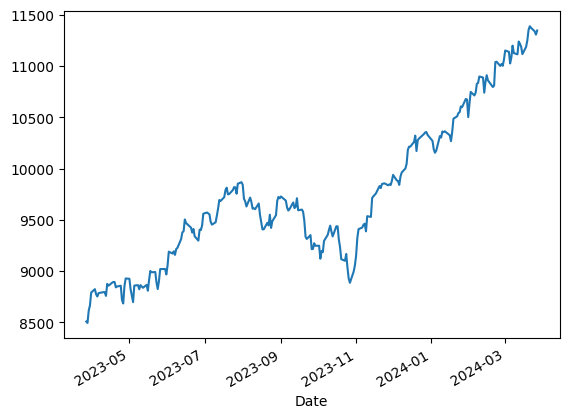

In [32]:
sp500tr_df['Close'].plot()

In [12]:
# P0 = sp500tr_df.iloc[0]['Close']
# P1 = sp500tr_df.iloc[-1]['Close']

HPR로 하면 market timing에 노출된다. 

그냥 일평균 수익률 내서 이를 annualize하자. 

In [22]:
returns = sp500tr_df['Close'].pct_change()

<Axes: xlabel='Close', ylabel='Count'>

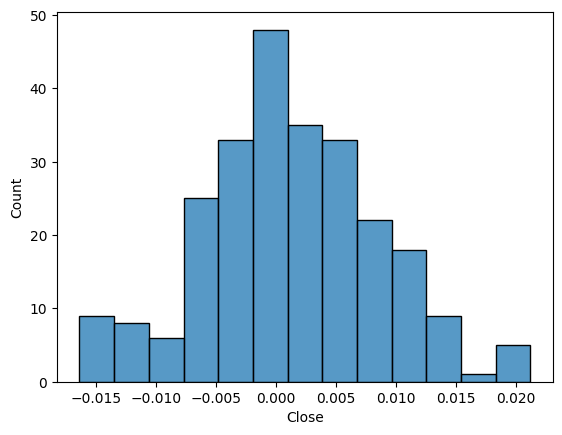

In [35]:
sns.histplot(data=returns)

In [23]:
rf = 0.040727

In [41]:
mean = returns.mean()
mean_annualized = (1 + mean)**252 - 1
mean_annualized * 100

34.25482737222578

In [42]:
gmean = (1 + returns).prod()**(1/len(returns)) - 1
gmean_annualized = (1 + gmean)**252 - 1
gmean_annualized * 100

33.21306607876042

In [43]:
risk_premium = gmean_annualized - rf
risk_premium * 100

29.140366078760422

In [44]:
def get_k(beta, rm, rf):
    return rf + beta * (rm - rf)

In [45]:
KO_k = get_k(0.59, gmean_annualized, rf)
XOM_k = get_k(0.95, gmean_annualized, rf)
AAPL_k = get_k(1.29, gmean_annualized, rf)

In [49]:
print(f'KO: {KO_k * 100:.4f}%')
print(f'XOM: {XOM_k * 100:.4f}%')
print(f'AAPL: {AAPL_k * 100:.4f}%')

KO: 21.2655%
XOM: 31.7560%
AAPL: 41.6638%


Dividend 데이터 

In [50]:
KO = yf.Ticker('KO')
XOM = yf.Ticker('XOM')
AAPL = yf.Ticker('AAPL')

In [52]:
KO_div = KO.dividends
XOM_div = XOM.dividends
AAPL_div = AAPL.dividends

In [53]:
KO_div

Date
1962-03-13 00:00:00-05:00    0.001563
1962-06-11 00:00:00-04:00    0.001563
1962-09-11 00:00:00-04:00    0.001563
1962-11-28 00:00:00-05:00    0.001563
1963-03-11 00:00:00-05:00    0.001758
                               ...   
2023-03-16 00:00:00-04:00    0.460000
2023-06-15 00:00:00-04:00    0.460000
2023-09-14 00:00:00-04:00    0.460000
2023-11-30 00:00:00-05:00    0.460000
2024-03-14 00:00:00-04:00    0.485000
Name: Dividends, Length: 248, dtype: float64

In [56]:
KO_div5y = KO_div.loc[KO_div.index > '2019-01-01']
XOM_div5y = XOM_div.loc[XOM_div.index > '2019-01-01']
AAPL_div5y = AAPL_div.loc[AAPL_div.index > '2019-01-01']

<Axes: title={'center': 'KO Dividends'}, xlabel='Date'>

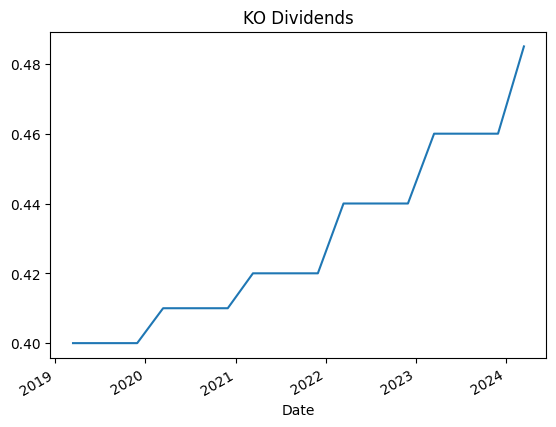

In [ ]:
KO_div5y.plot(title='KO Dividends')

In [67]:
KO_g = (1+KO_div5y.pct_change().mean())**4 - 1
KO_g * 100

3.994717618400734

In [68]:
XOM_g = (1+XOM_div5y.pct_change().mean())**4 - 1
XOM_g * 100

3.0444901022934623

In [69]:
AAPL_g = (1+AAPL_div5y.pct_change().mean())**4 - 1
AAPL_g * 100

5.756930576722552

calculate g from yahoo finance

In [72]:
KO_divy = 0.0320
XOM_divy = 0.0334
AAPL_divy = 0.0057

In [73]:
KO_plowback = 1 - KO_divy
XOM_plowback = 1 - XOM_divy
AAPL_plowback = 1 - AAPL_divy

In [74]:
KO_ROE = 0.4016
XOM_ROE = 0.1800
AAPL_ROE = 1.5427

In [75]:
KO_g_est = KO_ROE * KO_plowback
XOM_g_est = XOM_ROE * XOM_plowback
AAPL_g_est = AAPL_ROE * AAPL_plowback

In [76]:
print(f'KO: {KO_g_est * 100:.4f}%')
print(f'XOM: {XOM_g_est * 100:.4f}%')
print(f'AAPL: {AAPL_g_est * 100:.4f}%')

KO: 38.8749%
XOM: 17.3988%
AAPL: 153.3907%


PVGO 계산


In [77]:
KO_eps = 2.47
XOM_eps = 8.89
AAPL_eps = 6.43

In [78]:
KO_div_usd = 1.94
XOM_div_usd = 3.80
AAPL_div_usd = 0.96

In [79]:
def calculate_V0(g, k, div):
    return div / (k - g)

In [80]:
KO_V0 = calculate_V0(KO_g, KO_k, KO_div_usd)
XOM_V0 = calculate_V0(XOM_g, XOM_k, XOM_div_usd)
AAPL_V0 = calculate_V0(AAPL_g, AAPL_k, AAPL_div_usd)

In [81]:
print(f'KO: {KO_V0:.4f}')
print(f'XOM: {XOM_V0:.4f}')
print(f'AAPL: {AAPL_V0:.4f}')

KO: 11.2328
XOM: 13.2351
AAPL: 2.6736


In [82]:
def calculate_nogrowth_V(eps, k):
    return eps / k

In [83]:
KO_nogrowth_V = calculate_nogrowth_V(KO_eps, KO_k)
XOM_nogrowth_V = calculate_nogrowth_V(XOM_eps, XOM_k)
AAPL_nogrowth_V = calculate_nogrowth_V(AAPL_eps, AAPL_k)

In [84]:
print(f'KO: {KO_nogrowth_V:.4f}')
print(f'XOM: {XOM_nogrowth_V:.4f}')
print(f'AAPL: {AAPL_nogrowth_V:.4f}')

KO: 11.6150
XOM: 27.9947
AAPL: 15.4331


In [85]:
KO_PVGO = KO_V0 - KO_nogrowth_V
XOM_PVGO = XOM_V0 - XOM_nogrowth_V
AAPL_PVGO = AAPL_V0 - AAPL_nogrowth_V

In [86]:
print(f'KO: {KO_PVGO:.4f}') 
print(f'XOM: {XOM_PVGO:.4f}')
print(f'AAPL: {AAPL_PVGO:.4f}')

KO: -0.3822
XOM: -14.7596
AAPL: -12.7595


V1 구하기 

(1+g) 만 곱하면 됨. 

In [87]:
KO_V1 = KO_V0 * (1 + KO_g)
XOM_V1 = XOM_V0 * (1 + XOM_g)
AAPL_V1 = AAPL_V0 * (1 + AAPL_g)

In [88]:
print(f'KO: {KO_V1:.4f}')   
print(f'XOM: {XOM_V1:.4f}')
print(f'AAPL: {AAPL_V1:.4f}')

KO: 11.6816
XOM: 13.6380
AAPL: 2.8275


Earning 구하기 

In [91]:
KO_now = KO.history(period='1d')['Close'].iloc[-1]
XOM_now = XOM.history(period='1d')['Close'].iloc[-1]
AAPL_now = AAPL.history(period='1d')['Close'].iloc[-1]

In [93]:
def expected_ret(V1, P0):
    return (V1 - P0) / P0

In [96]:
KO_expR = expected_ret(KO_V1, KO_now) * 100
XOM_expR = expected_ret(XOM_V1, XOM_now) * 100
AAPL_expR = expected_ret(AAPL_V1, AAPL_now) * 100

In [97]:
print(f'KO: {KO_expR:.4f}')
print(f'XOM: {XOM_expR:.4f}')
print(f'AAPL: {AAPL_expR:.4f}')

KO: -80.8593
XOM: -88.1377
AAPL: -98.3685


In [99]:
print(f'KO error: {KO_now/KO_V0}')
print(f'XOM error: {XOM_now/XOM_V0}')
print(f'AAPL error: {AAPL_now/AAPL_V0}')

KO error: 5.43317939856014
XOM error: 8.686757422786686
AAPL error: 64.82306917996758
